In [1]:
from matplotlib.pylab import *
from dtcwt_jax.numpyy.transform3d import Transform3d
from jax import lax, random, numpy as jnp

GRID_SIZE = 64
SPHERE_RAD = int(0.45 * GRID_SIZE) + 0.5


grid = np.arange(-(GRID_SIZE>>1), GRID_SIZE>>1)
X, Y, Z = np.meshgrid(grid, grid, grid)
r = np.sqrt(X*X + Y*Y + Z*Z)

sphere = 0.5 + 0.5 * np.clip(SPHERE_RAD-r, -1, 1)

from testUtils.spleenTest import get_spleen_data
cached_subj =get_spleen_data()[0]
sample_3d_ct=jnp.array(cached_subj[0][0,0,:,:,:])


/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


data loaded from hdf5


In [29]:
import jax
import jax.numpy as jnp
import einops
import numpy as np
def reflect(x, minx, maxx):
    """Reflect the values in matrix *x* about the scalar values *minx* and
    *maxx*.  Hence a vector *x* containing a long linearly increasing series is
    converted into a waveform which ramps linearly up and down between *minx* and
    *maxx*.  If *x* contains integers and *minx* and *maxx* are (integers + 0.5), the
    ramps will have repeated max and min samples.

    .. codeauthor:: Rich Wareham <rjw57@cantab.net>, Aug 2013
    .. codeauthor:: Nick Kingsbury, Cambridge University, January 1999.

    """
    x = jnp.array(x)
    rng = maxx - minx #range
    rng_by_2 = 2 * rng
    # mod = jnp.fmod(x - minx, rng_by_2)
    xx=x - minx
    a=rng_by_2
    #differentiable fmod from https://discuss.pytorch.org/t/fmod-or-remainder-runtimeerror-the-derivative-for-other-is-not-implemented/64276/4
    mod =( a / jnp.pi )*jnp.arctan( jnp.tan( jnp.pi* ( xx / a - 0.5 ) ) ) + a / 2
    print(f"mod {jnp.round(mod,1)}")
    normed_mod = jnp.where(mod < 0, mod + rng_by_2, mod)
    print(f"normed mod {jnp.round(normed_mod,1)}")
    out = jnp.where(normed_mod >= rng, rng_by_2 - normed_mod, normed_mod) #+ minx
    print(f"out {jnp.round(out)}")
    return jnp.array(out, dtype=x.dtype)
aa= jnp.array(np.random.random(10)*10)

print(f"3 6  {reflect(aa,3.0,6.0)}")
print(f"1 5  {reflect(aa,1.0,5.0)}")
print(f"4 7  {reflect(aa,4.0,7.0)}")

mod [4.        5.3       0.3       0.1       3.6000001 0.6       5.3
 2.9       4.3       3.3      ]
normed mod [4.        5.3       0.3       0.1       3.6000001 0.6       5.3
 2.9       4.3       3.3      ]
out [2. 1. 0. 0. 2. 1. 1. 3. 2. 3.]
3 6  [1.952384   0.6654806  0.26861048 0.13039184 2.3696015  0.6442437
 0.7224283  2.8649464  1.7035551  2.6535323 ]
mod [6.        7.3       2.3       2.1000001 7.6       0.6       1.3000001
 4.9       6.3       5.3      ]
normed mod [6.        7.3       2.3       2.1000001 7.6       0.6       1.3000001
 4.9       6.3       5.3      ]
out [2. 1. 2. 2. 0. 1. 1. 3. 2. 3.]
1 5  [1.952384   0.6654806  2.2686105  2.130392   0.36960125 0.64424324
 1.2775717  3.1350536  1.7035551  2.6535325 ]
mod [3.        4.3       5.3       5.1       2.6000001 5.6       4.3
 1.9       3.3       2.3      ]
normed mod [3.        4.3       5.3       5.1       2.6000001 5.6       4.3
 1.9       3.3       2.3      ]
out [3. 2. 1. 1. 3. 0. 2. 2. 3. 2.]
4 7  [2.952384   1

In [27]:
np.fmod(-50,241)

-50

In [2]:
trans = Transform3d()
discard_level_1=False
sample_3d_ct_t = trans.forward(sample_3d_ct, nlevels=2,discard_level_1=discard_level_1)

In [3]:
print(sample_3d_ct_t.lowpass.shape)
# print(sample_3d_ct_t.highpasses[0].shape)
# print(sphere_t.scales.shape)

(128, 128, 64)


In [4]:
Z = trans.inverse(sample_3d_ct_t)
print(np.abs(Z - sample_3d_ct).max()) # Should be < 1e-12

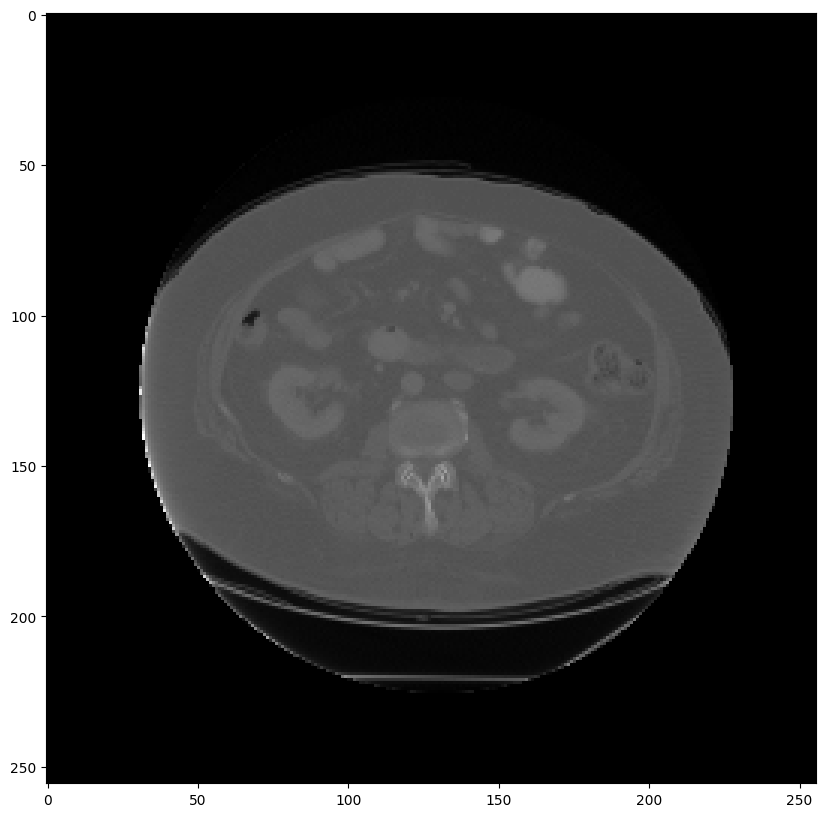

In [5]:
plt.figure(figsize=(20, 10))
plt.style.use('grayscale')
plt.imshow(np.rot90(Z[:,:,32]))

In [7]:
import einops
import numpy as np

a=np.array([[1,2]])
b=np.array([[3,4]])
einops.rearrange([b,a],'b x y-> (b x) y')


array([[3, 4],
       [1, 2]])